In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model

In [3]:
import warnings
warnings.filterwarnings("ignore") #just to ignore deprecated error warnings 

Q1. What is the general content of the dataset?

Ans. Dataset 12711-0002 contains the informaton about the migration between Germany (immigrantion and emigration) and the rest of EU countries throughout the year 1974 to 2014. This number of migration has also been  divided according to Gender throughout the period across EU countries.

In [4]:
col = (range(1970,2015))
col[0] = 'EU'
col[1] = 'Sex'
col[2] = 'Arrivals or Departure'
col[3] = 'Unit'

col
# In this cell column names of the dataset has been assigned.

['EU',
 'Sex',
 'Arrivals or Departure',
 'Unit',
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014]

In [5]:
Data = pd.read_excel('/home/rahul/Downloads/12711-0002.xls', sheetname=0, header = 3, skip_footer=3, names = col)

In [6]:
Data['EU'] = Data['EU'].fillna(method='ffill') #Data has been loaded into Pandas Dataframe and cells with missing strings have been filled.

In [7]:
Data['Sex'] = Data['Sex'].fillna(method='ffill')

In [8]:
Data

,EU,Sex,Arrivals or Departure,Unit,1974,1975,1976,1977,1978,1979,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Austria,Male,Arrivals from foreign countries,number,13728,8754,9695,10070,11897,17099,...,7622,8159,8776,9197,9671,9964,10171,9918,10004,10387
1,Austria,Male,Departures to foreign countries,number,17977,12271,9899,9730,10893,11418,...,9368,10053,10828,12960,12194,10681,10631,10826,10799,11463
2,Austria,Female,Arrivals from foreign countries,number,8541,6465,6447,6683,6536,7346,...,6136,6560,6967,7631,7867,7895,8419,8590,8625,8906
3,Austria,Female,Departures to foreign countries,number,8450,7190,6288,5931,5999,5853,...,8167,8551,9324,11089,10380,9208,9145,9173,9542,9975
4,Austria,Total,Arrivals from foreign countries,number,22269,15219,16142,16753,18433,24445,...,13758,14719,15743,16828,17538,17859,18590,18508,18629,19293
5,Austria,Total,Departures to foreign countries,number,26427,19461,16187,15661,16892,17271,...,17535,18604,20152,24049,22574,19889,19776,19999,20341,21438
6,Belgium,Male,Arrivals from foreign countries,number,2412,2245,2296,2399,2324,2474,...,2385,2257,2344,2431,2516,2794,2983,3101,3156,3360
7,Belgium,Male,Departures to foreign countries,number,2800,2490,2413,2198,2163,2118,...,2317,2390,2435,2685,2654,2436,2345,2292,2627,2941
8,Belgium,Female,Arrivals from foreign countries,number,2105,2022,2057,2103,1967,2037,...,1882,1858,1854,1997,1988,2140,2236,2467,2669,2739
9,Belgium,Female,Departures to foreign countries,number,2100,2113,2004,1830,1810,1742,...,2085,2150,2281,2396,2416,2087,2060,1899,2413,2388


Q2. Is there an increase in the number of departures across the years?

Ans. Below are the processing steps to get the dataframe of number of departures across the years. Function of processing has been created for that. 

In [9]:
Dep_df = Data.loc[Data['Arrivals or Departure'] == 'Departures to foreign countries']

def processing(df2, df1):
    df2 = df2.loc[df1['Sex'] == 'Total']
    df2 = df2.set_index(['EU'])
    df2.drop(['Sex', 'Arrivals or Departure','Unit'], axis=1, inplace=True)
    df2.convert_objects(convert_numeric=True).dtypes
    
    return df2

Dep_df = processing(Dep_df,Data)
Dep_df

,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
EU,,,,,,,,,,,,,,,,,,,,,
Austria,26427,19461,16187,15661,16892,17271,21135,23199,20804,17003,...,17535,18604,20152,24049,22574,19889,19776,19999,20341,21438
Belgium,4900,4603,4417,4028,3973,3860,3780,3958,3943,3894,...,4402,4540,4716,5081,5070,4523,4405,4191,5040,5329
Bulgaria,-,-,-,-,-,-,-,-,-,-,...,-,-,8382,15864,19940,23785,29422,33741,38594,44491
Croatia,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,12753,17327
Cyprus,-,-,-,-,-,-,-,-,-,-,...,-,-,278,356,340,335,315,298,394,497
Czech Republic,-,-,-,-,-,-,-,-,-,-,...,-,-,6636,8082,7586,6067,5889,6287,7377,8831
Denmark,1968,1742,1913,1628,1694,1625,1659,1743,1819,1988,...,2694,3115,4014,4549,4270,3322,3075,2928,3053,3642
Estonia,-,-,-,-,-,-,-,-,-,-,...,-,-,526,774,692,779,832,867,863,936
Finland,2031,1790,1348,1326,1577,1402,1579,1724,1640,1548,...,2172,2146,2172,2485,2663,2191,2025,2175,2146,2422


In 1974 the number of departures across all the countries has been 318401 in total. Same goes for all the years

After plotting the number of departures across all the years, we can see that the trend has been decreasing till 2006 and then increase till 2014. However it is not a clear picture because there are missing values for the number of departures of some countries in the dataframe. 

1974    318401.0
1975    298072.0
1976    256251.0
1977    223279.0
1978    204578.0
1979    191232.0
1980    195743.0
1981    196755.0
1982    200932.0
1983    184475.0
1984    178635.0
1985    147409.0
1986    131790.0
1987    127697.0
1988    122518.0
1989    132965.0
1990    130986.0
1991    145703.0
1992    148397.0
1993    155182.0
1994    180431.0
1995    185588.0
1996    201230.0
1997    197969.0
1998    186855.0
1999    178252.0
2000    163801.0
2001    161161.0
2002    164305.0
2003    153652.0
2004    170603.0
2005    147038.0
2006    147039.0
2007    343955.0
2008    407457.0
2009    405535.0
2010    366543.0
2011    385529.0
2012    417504.0
2013    484822.0
2014    575480.0
dtype: float64


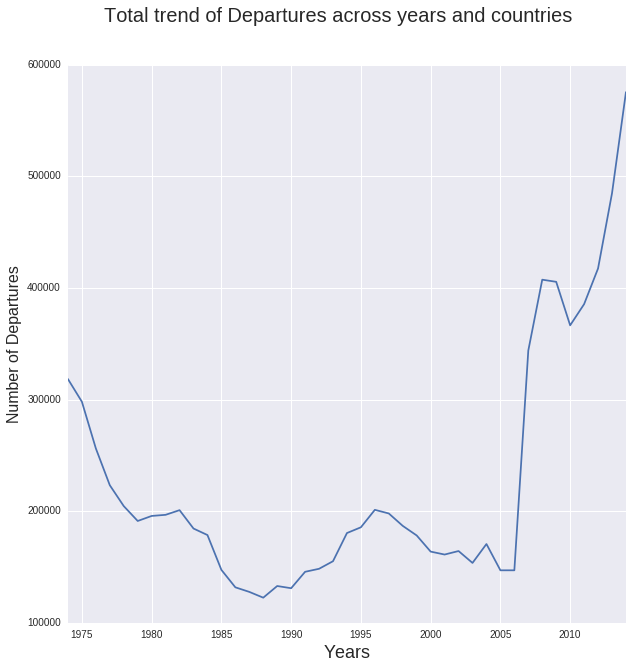

In [10]:
Dep_yrs = Dep_df.convert_objects(convert_numeric=True).sum()
print Dep_yrs

def plotTrend(df,z):
    (df.convert_objects(convert_numeric=True).T).plot(figsize=(10,10))
    plt.suptitle('Total trend of %s across years and countries' %z, fontsize=20)
    plt.xlabel('Years', fontsize=18)
    plt.ylabel('Number of %s' %z, fontsize=16)
    plt.show()
    
plotTrend(Dep_yrs, 'Departures')

In the below codes, countries with missing values of the number of departures in any years have been dropped. Actually it seems that the trend has been decreasing throughout the years.

[u'Austria' u'Belgium' u'Bulgaria' u'Croatia' u'Cyprus' u'Czech Republic'
 u'Denmark' u'Estonia' u'Finland' u'France' u'Greece' u'Hungary' u'Ireland'
 u'Italy' u'Latvia' u'Lithuania' u'Luxembourg' u'Malta' u'Netherlands'
 u'Poland' u'Portugal' u'Romania' u'Slovakia' u'Slovenia' u'Spain'
 u'Sweden' u'United Kingdom']
1974    318401.0
1975    298072.0
1976    256251.0
1977    223279.0
1978    204578.0
1979    191232.0
1980    195743.0
1981    196755.0
1982    200932.0
1983    184475.0
1984    178635.0
1985    147409.0
1986    131790.0
1987    127697.0
1988    122518.0
1989    132965.0
1990    130986.0
1991    145703.0
1992    148397.0
1993    155182.0
1994    180431.0
1995    185588.0
1996    201230.0
1997    197969.0
1998    186855.0
1999    178252.0
2000    163801.0
2001    161161.0
2002    164305.0
2003    153652.0
2004    170603.0
2005    147038.0
2006    147039.0
2007    151151.0
2008    172973.0
2009    171209.0
2010    145013.0
2011    138253.0
2012    139655.0
2013    153708.0
20

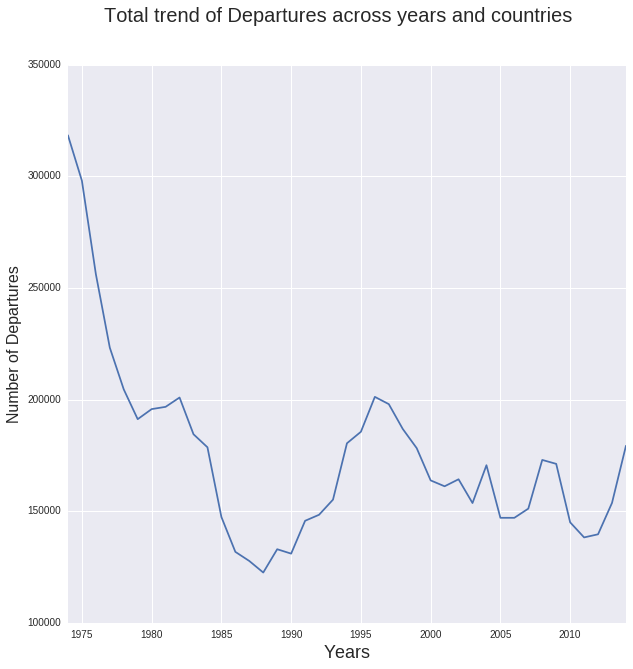

In [11]:
Dep_yrs2 = Dep_df.convert_objects(convert_numeric=True).sum(axis=1, skipna=False)
ind = Dep_yrs2.dropna()
print np.array(Dep_yrs2.index)
Dep_yrs3 = Dep_df.ix[ind.index]
Dep_yrs4 = Dep_yrs3.sum()
print Dep_yrs4

plotTrend(Dep_yrs4, 'Departures')

Q3. In which year and country was the highest number of departures?

Ans. Poland has the highest number of departures in 2014. Functions have been created to get these. 

In [12]:
def maxim(df):
    return df.max()

maxim(Dep_df.convert_objects(convert_numeric=True))

1974    122888.0
1975    106870.0
1976     87392.0
1977     77971.0
1978     76645.0
1979     76656.0
1980     80092.0
1981     83657.0
1982     84896.0
1983     75236.0
1984     64947.0
1985     54618.0
1986     44757.0
1987     42451.0
1988     40038.0
1989     41589.0
1990     37004.0
1991     39207.0
1992     36162.0
1993     34134.0
1994     35947.0
1995     37769.0
1996     40819.0
1997     40758.0
1998     39867.0
1999     38367.0
2000     36707.0
2001     36104.0
2002     36535.0
2003     33802.0
2004     36273.0
2005     28579.0
2006     26807.0
2007    120791.0
2008    132438.0
2009    122629.0
2010    103237.0
2011    106495.0
2012    114425.0
2013    125399.0
2014    138680.0
dtype: float64

In [13]:
def maxYear(df):
    return max(df)

max_dep_yr = maxYear(Dep_df.convert_objects(convert_numeric=True))
max_dep_yr

2014

In [14]:
def maxCountry(df, yr):
    return df[yr].idxmax()


print maxCountry(Dep_df.convert_objects(convert_numeric=True),max_dep_yr)


Poland


Plot has constructed to see the trends of the number of departures across the years and the countries.

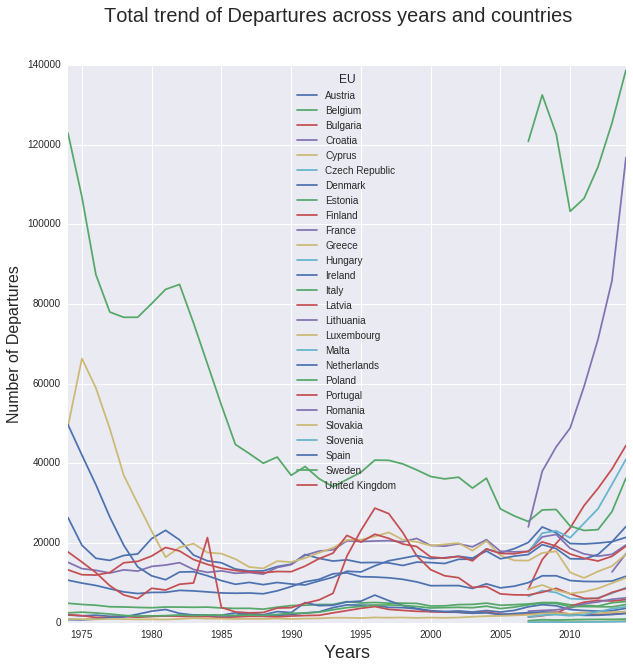

In [15]:
plotTrend(Dep_df,'Departures')

Q4 Which country shows the most arrivals and in which year?

Ans. Same working has been done for the number of arrival across the years and countries as it was done for the number of departures across the years and countries. And the same functions that were used to get for the departure have been used to the country and year to get the most arrivals.
Poland has the most arrivals in 2014.

                 1974   1975   1976   1977   1978   1979   1980   1981   1982  \
EU                                                                              
Austria         22269  15219  16142  16753  18433  24445  27849  24324  18367   
Belgium          4517   4267   4353   4502   4291   4511   5016   4817   4489   
Bulgaria            -      -      -      -      -      -      -      -      -   
Croatia             -      -      -      -      -      -      -      -      -   
Cyprus              -      -      -      -      -      -      -      -      -   
Czech Republic      -      -      -      -      -      -      -      -      -   
Denmark          2311   1950   1868   1678   1801   1971   2288   2364   1930   
Estonia             -      -      -      -      -      -      -      -      -   
Finland          2038   1424   1456   1731   1863   1788   1971   1648   1547   
France          16513  13507  13634  13990  14584  17161  19007  17014  13893   
Greece          30473  18626

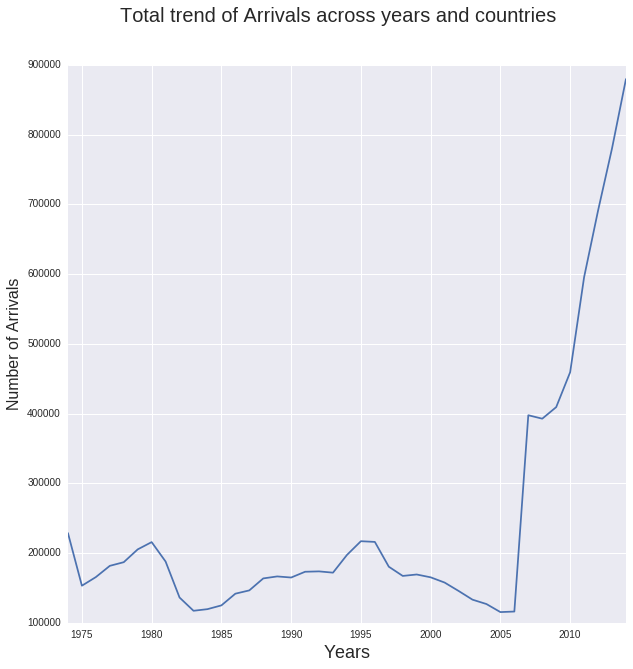

In [16]:
Arr_df = Data.loc[Data['Arrivals or Departure'] == 'Arrivals from foreign countries']
Arr_df = processing(Arr_df,Data)
print Arr_df


Arr_yrs = Arr_df.convert_objects(convert_numeric=True).sum()
print Arr_yrs
plotTrend(Arr_yrs, 'Arrivals')

[u'Austria' u'Belgium' u'Bulgaria' u'Croatia' u'Cyprus' u'Czech Republic'
 u'Denmark' u'Estonia' u'Finland' u'France' u'Greece' u'Hungary' u'Ireland'
 u'Italy' u'Latvia' u'Lithuania' u'Luxembourg' u'Malta' u'Netherlands'
 u'Poland' u'Portugal' u'Romania' u'Slovakia' u'Slovenia' u'Spain'
 u'Sweden' u'United Kingdom']
1974    228595.0
1975    153183.0
1976    165541.0
1977    181652.0
1978    186903.0
1979    205255.0
1980    215691.0
1981    187817.0
1982    136236.0
1983    117242.0
1984    119560.0
1985    124967.0
1986    141739.0
1987    146463.0
1988    163630.0
1989    166488.0
1990    164915.0
1991    173190.0
1992    173717.0
1993    171881.0
1994    197286.0
1995    216984.0
1996    215974.0
1997    180432.0
1998    167197.0
1999    169267.0
2000    165203.0
2001    157709.0
2002    145707.0
2003    133167.0
2004    126898.0
2005    115356.0
2006    116145.0
2007    131663.0
2008    139992.0
2009    146815.0
2010    156055.0
2011    186109.0
2012    224477.0
2013    250519.0
20

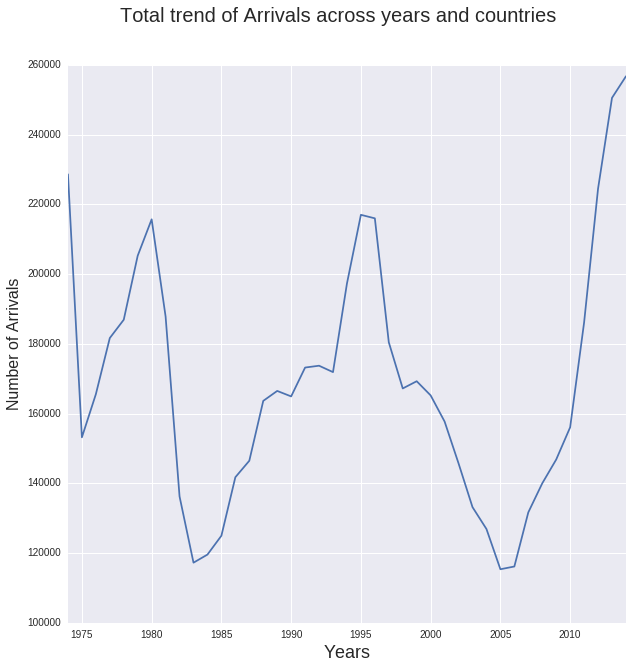

In [17]:
Arr_yrs2 = Arr_df.convert_objects(convert_numeric=True).sum(axis=1, skipna=False)
ind2 = Arr_yrs2.dropna()
print np.array(Arr_yrs2.index)
Arr_yrs3 = Arr_df.ix[ind2.index]
Arr_yrs4 = Arr_yrs3.sum()
print Arr_yrs4

plotTrend(Arr_yrs4, 'Arrivals')

In [18]:
maxim(Arr_df.convert_objects(convert_numeric=True))

1974     88062.0
1975     53135.0
1976     69179.0
1977     82875.0
1978     85697.0
1979     91876.0
1980     88865.0
1981     67567.0
1982     43834.0
1983     38491.0
1984     40238.0
1985     41948.0
1986     49243.0
1987     48005.0
1988     44549.0
1989     43061.0
1990     39679.0
1991     38372.0
1992     33788.0
1993     35273.0
1994     42531.0
1995     53118.0
1996     51105.0
1997     41557.0
1998     37660.0
1999     37212.0
2000     35385.0
2001     31578.0
2002     26882.0
2003     23702.0
2004     21422.0
2005     20268.0
2006     20130.0
2007    153589.0
2008    131308.0
2009    122797.0
2010    125861.0
2011    172676.0
2012    184325.0
2013    197009.0
2014    197908.0
dtype: float64

In [19]:
max_arr_yr = maxYear(Arr_df.convert_objects(convert_numeric=True))
max_arr_yr

2014

In [20]:
print maxCountry(Arr_df.convert_objects(convert_numeric=True),max_arr_yr)

Poland


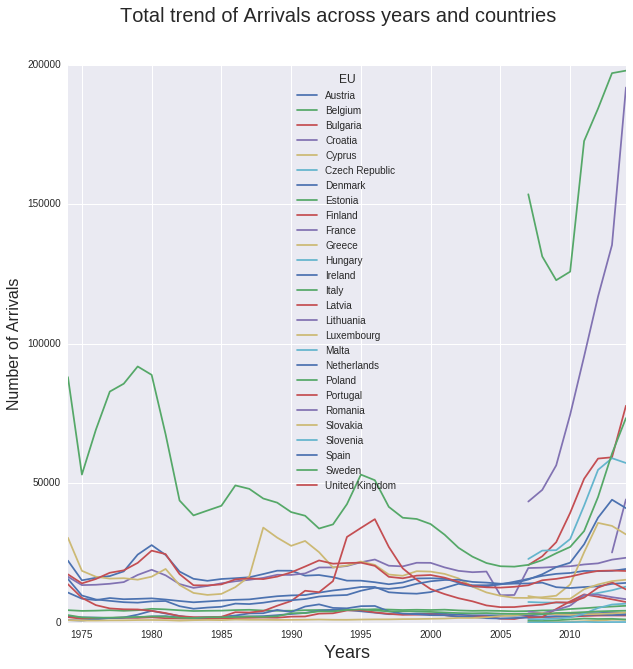

In [21]:
plotTrend(Arr_df,'Arrivals')

Q5. What total numbers for departures and arrivals are to be expected for 2015 or
2016 for each country?

Ans. This question has been tackled by regression. As Croatia has only data for 2013 and 2014, it has been excluded from the regression analysis approach. Instead difference between the 2013 and 2014 has been added to 2014 to get the expected departure and arrivals for 2015 and subsquently for 2016. 

In [22]:
def exp_with_nonnumeric_columns(df, yr1,yr2,yr3):

    df3 = df[[yr1, yr2, yr3]].convert_objects(convert_numeric=True)
    df5 = df3[df3.isnull().any(axis=1)]
    df5['diff'] = df5[yr3].sub(df5[yr2], axis=0)
    df5[int(yr3)+1] = df5['diff'] + df5[yr3]
    df5[int(yr3)+2] = df5['diff'] + df5[int(yr3)+1]
    return df5

exp_with_nonnumeric_columns(Dep_df,2012,2013,2014)


,2012,2013,2014,diff,2015,2016
EU,,,,,,
Croatia,NaN,12753,17327,4574,21901,26475


In [23]:
exp_with_nonnumeric_columns(Arr_df,2012,2013,2014)

,2012,2013,2014,diff,2015,2016
EU,,,,,,
Croatia,NaN,25200,44240,19040,63280,82320


Simple linear regression has been fitted into the dataset of departures and arrivals. Since there are missing values before 2007 for many countries, data from 2007 to 2014 has been used for fitting the model.

In [24]:
regr = linear_model.LinearRegression()

In [25]:
years = np.array([[2007],[2008],[2009],[2010],[2011],[2012],[2013],[2014]])
yr = np.arange(2007,2015)
years
#yr

array([[2007],
       [2008],
       [2009],
       [2010],
       [2011],
       [2012],
       [2013],
       [2014]])

In [26]:
austria_output = np.array(pd.DataFrame(Dep_df[yr].ix['Austria'])).astype(int)
austria_output

array([[20152],
       [24049],
       [22574],
       [19889],
       [19776],
       [19999],
       [20341],
       [21438]])

In [27]:
regr.fit(years, austria_output)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [28]:
print('Coefficients: \n', regr.coef_)

print('intercept: \n', regr.intercept_)

print('Variance score: %.2f' % regr.score(years, austria_output))

('Coefficients: \n', array([[-206.85714286]]))
('intercept: \n', array([ 436913.53571429]))
Variance score: 0.11


In [29]:
regr.predict(np.array([[2015]]))

array([[ 20096.39285714]])

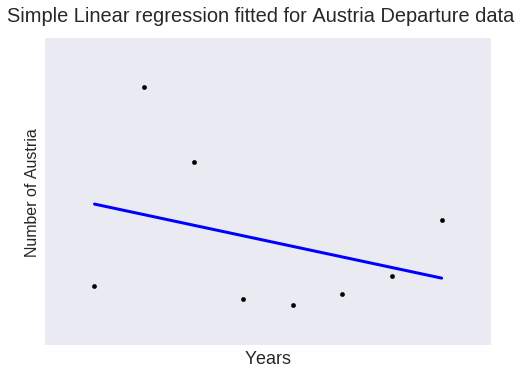

In [30]:
# Plot outputs
def regPlot(arr, inp, z, x):
    
    regr.fit(inp, arr)
    plt.scatter(years, arr,  color='black')
    plt.plot(years, regr.predict(inp), color='blue',
             linewidth=3)
    plt.suptitle('Simple Linear regression fitted for %s %s data' %(z,x), fontsize=20)
    plt.xlabel('Years', fontsize=18)
    plt.ylabel('Number of %s' %z, fontsize=16)
    plt.xticks(())
    plt.yticks(())
    plt.show()

regPlot(austria_output,years,'Austria','Departure')

As it can be seen from the above plot regression line is not fitted well for Austria's departure data. Moreover R-square is also very low. Below are the results for all the countries's expected departures and arrivals in 2015 and 2016.

In [31]:
Dep_df_revised = Dep_df.drop(['Croatia'])
#print Dep_df_revised
def linearReg(df,predyr):
    
    a = []
    for i in df.index:
        output = np.array(pd.DataFrame(df[yr].ix[i])).astype(int)
        regr.fit(years, output)
        a.append([i,regr.predict(np.array([[predyr]])), regr.score(years, output)])
    return a

linearReg(Dep_df_revised,2015)

[[u'Austria', array([[ 20096.39285714]]), 0.10667205319853823],
 [u'Belgium', array([[ 4865.67857143]]), 0.009588636542240403],
 [u'Bulgaria', array([[ 48926.64285714]]), 0.99553199044956742],
 [u'Cyprus', array([[ 436.10714286]]), 0.44860915466598406],
 [u'Czech Republic', array([[ 7510.35714286]]), 0.046712132947250629],
 [u'Denmark', array([[ 2837.5]]), 0.46722000892197812],
 [u'Estonia', array([[ 992.17857143]]), 0.79348320114152648],
 [u'Finland', array([[ 2200.5]]), 0.045816298074144668],
 [u'France', array([[ 17354.42857143]]), 0.16267945190488442],
 [u'Greece', array([[ 13745.39285714]]), 0.06279549369175641],
 [u'Hungary', array([[ 39857.96428571]]), 0.85493009570350753],
 [u'Ireland', array([[ 1894.35714286]]), 0.34234302689973817],
 [u'Italy', array([[ 30249.14285714]]), 0.15498092859287549],
 [u'Latvia', array([[ 7188.67857143]]), 0.90164378514848253],
 [u'Lithuania', array([[ 6774.57142857]]), 0.95931757118830219],
 [u'Luxembourg', array([[ 2834.82142857]]), 0.726045311193

In [32]:
linearReg(Dep_df_revised,2016)

[[u'Austria', array([[ 19889.53571429]]), 0.10667205319853823],
 [u'Belgium', array([[ 4881.52380952]]), 0.009588636542240403],
 [u'Bulgaria', array([[ 53848.70238095]]), 0.99553199044956742],
 [u'Cyprus', array([[ 454.88095238]]), 0.44860915466598406],
 [u'Czech Republic', array([[ 7602.79761905]]), 0.046712132947250629],
 [u'Denmark', array([[ 2666.58333333]]), 0.46722000892197812],
 [u'Estonia', array([[ 1038.52380952]]), 0.79348320114152648],
 [u'Finland', array([[ 2181.75]]), 0.045816298074144668],
 [u'France', array([[ 17016.85714286]]), 0.16267945190488442],
 [u'Greece', array([[ 13486.36904762]]), 0.06279549369175641],
 [u'Hungary', array([[ 42770.0952381]]), 0.85493009570350753],
 [u'Ireland', array([[ 1815.29761905]]), 0.34234302689973817],
 [u'Italy', array([[ 30938.53571429]]), 0.15498092859287549],
 [u'Latvia', array([[ 7904.44047619]]), 0.90164378514848253],
 [u'Lithuania', array([[ 7303.47619048]]), 0.95931757118830219],
 [u'Luxembourg', array([[ 2924.47619048]]), 0.7260

In [33]:
Arr_df_revised = Arr_df.drop(['Croatia'])
linearReg(Arr_df_revised,2015)

[[u'Austria', array([[ 19882.21428571]]), 0.90506299889863184],
 [u'Belgium', array([[ 6370.21428571]]), 0.98772170560947625],
 [u'Bulgaria', array([[ 81435.82142857]]), 0.96496663833039154],
 [u'Cyprus', array([[ 1190.42857143]]), 0.86741979760317489],
 [u'Czech Republic', array([[ 13203.96428571]]), 0.85883164240829701],
 [u'Denmark', array([[ 3859.03571429]]), 0.84356856655105261],
 [u'Estonia', array([[ 1591.46428571]]), 0.6089724322152974],
 [u'Finland', array([[ 2731.03571429]]), 0.77056737366859429],
 [u'France', array([[ 23370.53571429]]), 0.91103089044731789],
 [u'Greece', array([[ 41326.96428571]]), 0.84074858705732325],
 [u'Hungary', array([[ 66775.67857143]]), 0.90808956488909898],
 [u'Ireland', array([[ 3198.78571429]]), 0.86244843303324292],
 [u'Italy', array([[ 71913.35714286]]), 0.87330746305712215],
 [u'Latvia', array([[ 11152.10714286]]), 0.62832833200954674],
 [u'Lithuania', array([[ 11271.]]), 0.71598386848034334],
 [u'Luxembourg', array([[ 3389.28571429]]), 0.12128

In [34]:
linearReg(Arr_df_revised,2016)

[[u'Austria', array([[ 20328.5952381]]), 0.90506299889863184],
 [u'Belgium', array([[ 6653.17857143]]), 0.98772170560947625],
 [u'Bulgaria', array([[ 89521.55952381]]), 0.96496663833039154],
 [u'Cyprus', array([[ 1317.94047619]]), 0.86741979760317489],
 [u'Czech Republic', array([[ 14077.5952381]]), 0.85883164240829701],
 [u'Denmark', array([[ 3987.9047619]]), 0.84356856655105261],
 [u'Estonia', array([[ 1695.67857143]]), 0.6089724322152974],
 [u'Finland', array([[ 2813.23809524]]), 0.77056737366859429],
 [u'France', array([[ 23900.1547619]]), 0.91103089044731789],
 [u'Greece', array([[ 45816.67857143]]), 0.84074858705732325],
 [u'Hungary', array([[ 72784.69047619]]), 0.90808956488909898],
 [u'Ireland', array([[ 3349.6547619]]), 0.86244843303324292],
 [u'Italy', array([[ 79357.71428571]]), 0.87330746305712215],
 [u'Latvia', array([[ 12191.21428571]]), 0.62832833200954674],
 [u'Lithuania', array([[ 12223.33333333]]), 0.71598386848034334],
 [u'Luxembourg', array([[ 3424.73809524]]), 0.12

R-square results are better for arrivals data but worse for departure's data. I decided to try another similar approach with polynomial regression model with 3 degrees. In this model 3 new features are created. Let's say feature x is transformed into features 1,x,x**2 and x**3

In [35]:
years2 = np.array([[2007],[2008],[2009],[2010],[2011],[2012],[2013],[2014]])
yr2 = np.arange(2007,2015)
years2
#yr

array([[2007],
       [2008],
       [2009],
       [2010],
       [2011],
       [2012],
       [2013],
       [2014]])

In [36]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3)

In [37]:
print years2
p = poly.fit_transform(years2)
p

[[2007]
 [2008]
 [2009]
 [2010]
 [2011]
 [2012]
 [2013]
 [2014]]


array([[  1.00000000e+00,   2.00700000e+03,   4.02804900e+06,
          8.08429434e+09],
       [  1.00000000e+00,   2.00800000e+03,   4.03206400e+06,
          8.09638451e+09],
       [  1.00000000e+00,   2.00900000e+03,   4.03608100e+06,
          8.10848673e+09],
       [  1.00000000e+00,   2.01000000e+03,   4.04010000e+06,
          8.12060100e+09],
       [  1.00000000e+00,   2.01100000e+03,   4.04412100e+06,
          8.13272733e+09],
       [  1.00000000e+00,   2.01200000e+03,   4.04814400e+06,
          8.14486573e+09],
       [  1.00000000e+00,   2.01300000e+03,   4.05216900e+06,
          8.15701620e+09],
       [  1.00000000e+00,   2.01400000e+03,   4.05619600e+06,
          8.16917874e+09]])

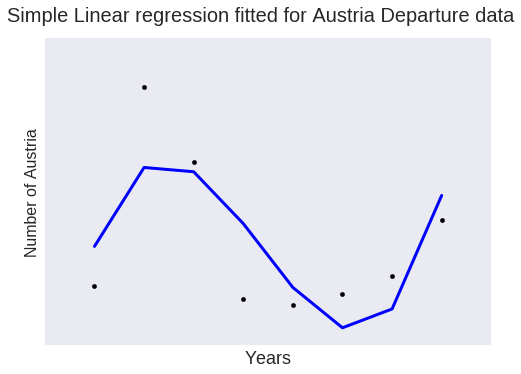

In [38]:
# Plot outputs

regPlot(austria_output,p,'Austria','Departure')

In [39]:
print('Coefficients: \n', regr.coef_)

print('intercept: \n', regr.intercept_)

print('Variance score: %.2f' % regr.score(p, austria_output))

('Coefficients: \n', array([[  0.00000000e+00,   1.40551282e+09,  -6.99143248e+05,
          1.15924670e+02]]))
('intercept: \n', array([ -9.41850117e+11]))
Variance score: 0.61


In [40]:
Cyprus_output = np.array(pd.DataFrame(Dep_df[yr].ix['Cyprus'])).astype(int)
Cyprus_output

array([[278],
       [356],
       [340],
       [335],
       [315],
       [298],
       [394],
       [497]])

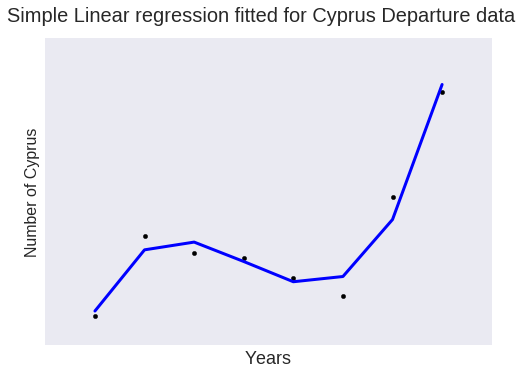

In [41]:
# Plot outputs

regPlot(Cyprus_output,p,'Cyprus','Departure')

As it can be seen that polynomial regression plot is fitting well into the data set and r-square results are also good. Let's try on all the dataset.

In [42]:
def polyReg(df,predyr):
    
    b = []
    twty = poly.fit_transform(np.array([[predyr]]))
#print twty15
    for i in df.index:
        output = np.array(pd.DataFrame(df[yr].ix[i])).astype(int)
        regr.fit(p, output)
        b.append([i,regr.predict(twty), regr.score(p, output)])
    
    
    return b

polyReg(Dep_df_revised,2015)

[[u'Austria', array([[ 26687.23632812]]), 0.61219208471425102],
 [u'Belgium', array([[ 6956.04504395]]), 0.77410989747928671],
 [u'Bulgaria', array([[ 51905.66967773]]), 0.99799645591777841],
 [u'Cyprus', array([[ 738.5440979]]), 0.96356401988617113],
 [u'Czech Republic', array([[ 13073.89746094]]), 0.83389153047364184],
 [u'Denmark', array([[ 5394.62573242]]), 0.9236878285372937],
 [u'Estonia', array([[ 1045.36125183]]), 0.8684016542467089],
 [u'Finland', array([[ 3227.53656006]]), 0.70869503951249235],
 [u'France', array([[ 27170.08789062]]), 0.900187223604628],
 [u'Greece', array([[ 26603.73095703]]), 0.77172343402669852],
 [u'Hungary', array([[ 53663.36474609]]), 0.97509167173945144],
 [u'Ireland', array([[ 3331.05029297]]), 0.8945853705091803],
 [u'Italy', array([[ 53424.78710938]]), 0.98031608317455365],
 [u'Latvia', array([[ 4356.67785645]]), 0.9698693644424885],
 [u'Lithuania', array([[ 6244.74194336]]), 0.99203452499389211],
 [u'Luxembourg', array([[ 3274.62329102]]), 0.820221

In [43]:
polyReg(Dep_df_revised,2016)

[[u'Austria', array([[ 34696.8828125]]), 0.61219208471425102],
 [u'Belgium', array([[ 9282.59338379]]), 0.77410989747928671],
 [u'Bulgaria', array([[ 60945.03881836]]), 0.99799645591777841],
 [u'Cyprus', array([[ 1100.34098816]]), 0.96356401988617113],
 [u'Czech Republic', array([[ 19249.46020508]]), 0.83389153047364184],
 [u'Denmark', array([[ 8179.01171875]]), 0.9236878285372937],
 [u'Estonia', array([[ 1213.94077301]]), 0.8684016542467089],
 [u'Finland', array([[ 4506.52655029]]), 0.70869503951249235],
 [u'France', array([[ 39669.18261719]]), 0.900187223604628],
 [u'Greece', array([[ 40527.91552734]]), 0.77172343402669852],
 [u'Hungary', array([[ 70104.97802734]]), 0.97509167173945144],
 [u'Ireland', array([[ 4787.11297607]]), 0.8945853705091803],
 [u'Italy', array([[ 79305.9609375]]), 0.98031608317455365],
 [u'Latvia', array([[ 2026.03637695]]), 0.9698693644424885],
 [u'Lithuania', array([[ 5755.81860352]]), 0.99203452499389211],
 [u'Luxembourg', array([[ 3940.20767212]]), 0.820221

In [44]:
polyReg(Arr_df_revised,2015)

[[u'Austria', array([[ 19875.41326904]]), 0.98459713585919906],
 [u'Belgium', array([[ 6243.62472534]]), 0.99527861129174033],
 [u'Bulgaria', array([[ 83249.0065918]]), 0.97193210536152075],
 [u'Cyprus', array([[ 1274.93623352]]), 0.95963486929788111],
 [u'Czech Republic', array([[ 13380.48937988]]), 0.97033166829441142],
 [u'Denmark', array([[ 3556.34815311]]), 0.93224198465604713],
 [u'Estonia', array([[ 526.29284668]]), 0.93434895475869351],
 [u'Finland', array([[ 2331.28674316]]), 0.97581258460722964],
 [u'France', array([[ 24624.66446686]]), 0.98847433036079402],
 [u'Greece', array([[ 17755.78710938]]), 0.97057458288953957],
 [u'Hungary', array([[ 50422.51367188]]), 0.97453084350206309],
 [u'Ireland', array([[ 2773.63684082]]), 0.91922189498191365],
 [u'Italy', array([[ 94958.55517578]]), 0.99368455199770611],
 [u'Latvia', array([[ 2260.88012695]]), 0.946364256259558],
 [u'Lithuania', array([[ 3149.73242188]]), 0.94375154669380312],
 [u'Luxembourg', array([[ 4278.28833008]]), 0.77

In [45]:
polyReg(Arr_df_revised,2016)

[[u'Austria', array([[ 20889.45629883]]), 0.98459713585919906],
 [u'Belgium', array([[ 6276.92773438]]), 0.99527861129174033],
 [u'Bulgaria', array([[ 90518.34155273]]), 0.97193210536152075],
 [u'Cyprus', array([[ 1322.39553833]]), 0.95963486929788111],
 [u'Czech Republic', array([[ 13093.38598633]]), 0.97033166829441142],
 [u'Denmark', array([[ 3490.51030064]]), 0.93224198465604713],
 [u'Estonia', array([[-488.9375]]), 0.93434895475869351],
 [u'Finland', array([[ 1801.69613647]]), 0.97581258460722964],
 [u'France', array([[ 26055.16075134]]), 0.98847433036079402],
 [u'Greece', array([[-8924.24609375]]), 0.97057458288953957],
 [u'Hungary', array([[ 31982.76757812]]), 0.97453084350206309],
 [u'Ireland', array([[ 2543.02157593]]), 0.91922189498191365],
 [u'Italy', array([[ 119342.17871094]]), 0.99368455199770611],
 [u'Latvia', array([[-5146.18164062]]), 0.946364256259558],
 [u'Lithuania', array([[-5271.18798828]]), 0.94375154669380312],
 [u'Luxembourg', array([[ 5101.37322998]]), 0.77917

Polynomial regression seems to be performing better than the simple linear regression to get the expected number of departures and arrivals for the year 2015 and 2016.

Q6. Is there a significant difference between the numbers of female and male departures across all countries in the years 2013 and 2014, respectively?

Ans. By barplot we can see if there's significant difference between the numbers of male and female departures accross all countries in the years 2013 and 2014, respectively.

In [46]:
Dep_df_2 = Data.loc[Data['Arrivals or Departure'] == 'Departures to foreign countries']

def processing_gender(df2, df1, yr, gender):
    df2 = df2.loc[df1['Sex'] == gender]
#Dep_df
    df2 = df2.set_index(['EU'])
    df2.drop(['Sex', 'Arrivals or Departure','Unit'], axis=1, inplace=True)
    #Dep_df.dtypes
    df2.convert_objects(convert_numeric=True).dtypes
    
    return df2[yr]


dep_females_13 = processing_gender(Dep_df_2, Data, 2013, 'Female')
dep_females_13

EU
Austria            9542
Belgium            2413
Bulgaria          11219
Croatia            3209
Cyprus              203
Czech Republic     3057
Denmark            1447
Estonia             428
Finland            1169
France             8498
Greece             5313
Hungary            8275
Ireland            1018
Italy             10367
Latvia             1710
Lithuania          2360
Luxembourg         1261
Malta               119
Netherlands        4594
Poland            38751
Portugal           2184
Romania           28621
Slovakia           3421
Slovenia            632
Spain              9151
Sweden             1946
United Kingdom     7981
Name: 2013, dtype: int64

In [47]:
dep_females_14 = processing_gender(Dep_df_2, Data, 2014, 'Female')
dep_females_14

EU
Austria            9975
Belgium            2388
Bulgaria          13212
Croatia            4355
Cyprus              237
Czech Republic     3678
Denmark            1770
Estonia             478
Finland            1293
France             9620
Greece             6576
Hungary           10120
Ireland            1129
Italy             13351
Latvia             1868
Lithuania          2419
Luxembourg         1328
Malta               125
Netherlands        5132
Poland            41414
Portugal           2469
Romania           39478
Slovakia           3807
Slovenia            823
Spain             10892
Sweden             2237
United Kingdom     9113
Name: 2014, dtype: int64

In [48]:
dep_males_13 = processing_gender(Dep_df_2, Data, 2013, 'Male')
dep_males_13

EU
Austria           10799
Belgium            2627
Bulgaria          27375
Croatia            9544
Cyprus              191
Czech Republic     4320
Denmark            1606
Estonia             435
Finland             977
France             8682
Greece             8902
Hungary           26476
Ireland            1057
Italy             17536
Latvia             3764
Lithuania          3555
Luxembourg         1387
Malta               133
Netherlands        5876
Poland            86648
Portugal           5452
Romania           57244
Slovakia           6519
Slovenia           2905
Spain             11173
Sweden             2046
United Kingdom     8704
Name: 2013, dtype: int64

In [49]:
dep_males_14 = processing_gender(Dep_df_2, Data, 2014, 'Male')
dep_males_14

EU
Austria           11463
Belgium            2941
Bulgaria          31279
Croatia           12972
Cyprus              260
Czech Republic     5153
Denmark            1872
Estonia             458
Finland            1129
France             9898
Greece            10645
Hungary           30904
Ireland            1225
Italy             22953
Latvia             3958
Lithuania          3825
Luxembourg         1494
Malta               190
Netherlands        6546
Poland            97266
Portugal           6134
Romania           77251
Slovakia           7479
Slovenia           3180
Spain             13259
Sweden             2338
United Kingdom    10121
Name: 2014, dtype: int64

In [50]:
#Dep_df[2014].append(dep_males_14, axis=0)

Dep14 = pd.concat([dep_males_14, dep_females_14, Dep_df[2014]], axis=1, join_axes=[dep_females_14.index])
Dep14.columns = ('Male', 'Female', 'Total')
Dep14

,Male,Female,Total
EU,,,
Austria,11463,9975,21438
Belgium,2941,2388,5329
Bulgaria,31279,13212,44491
Croatia,12972,4355,17327
Cyprus,260,237,497
Czech Republic,5153,3678,8831
Denmark,1872,1770,3642
Estonia,458,478,936
Finland,1129,1293,2422


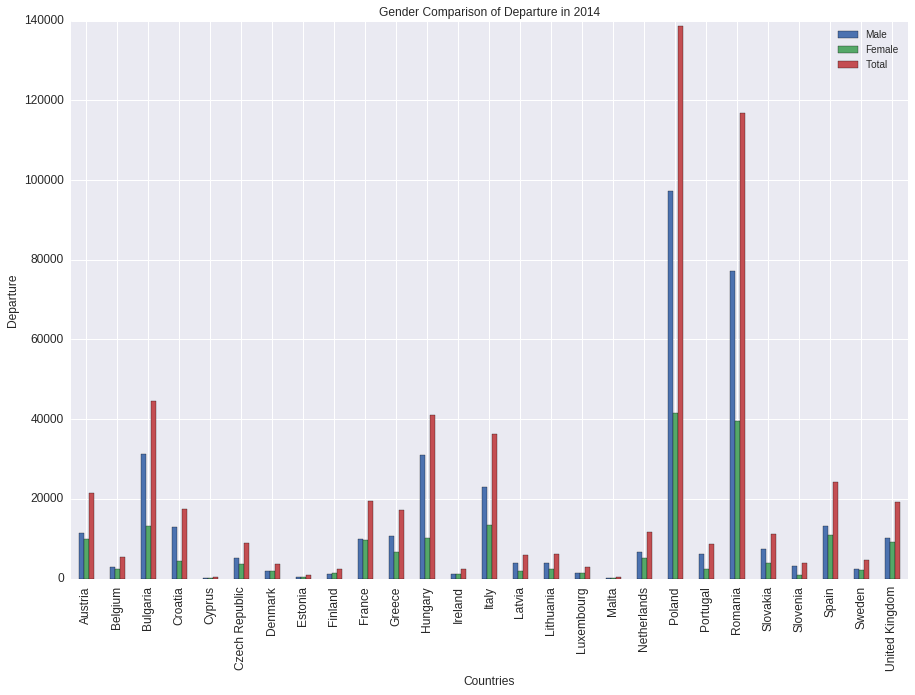

In [51]:
def genderplot(df, yr):
    
    ax = df[['Male', 'Female', 'Total']].plot(kind='bar', title ="Gender Comparison of Departure in %s" %yr,figsize=(15,10),legend=True, fontsize=12)
    ax.set_xlabel("Countries",fontsize=12)
    ax.set_ylabel("Departure",fontsize=12)
    plt.show()
    
genderplot(Dep14, 2014)

In 2014 Austria, Belgium, Cyprus, Denmark, Estonia,Finland, France, Ireland, Luxembourg, Malta, Netherlands, Spain, Swedan, UK didn't have any signficant differnce while the remaining countries have.

In [67]:
Dep13 = pd.concat([dep_males_13, dep_females_13, Dep_df[2013]], axis=1, join_axes=[dep_females_13.index])
Dep13.columns = ('Male', 'Female', 'Total')
Dep13

,Male,Female,Total
EU,,,
Austria,10799,9542,20341
Belgium,2627,2413,5040
Bulgaria,27375,11219,38594
Croatia,9544,3209,12753
Cyprus,191,203,394
Czech Republic,4320,3057,7377
Denmark,1606,1447,3053
Estonia,435,428,863
Finland,977,1169,2146


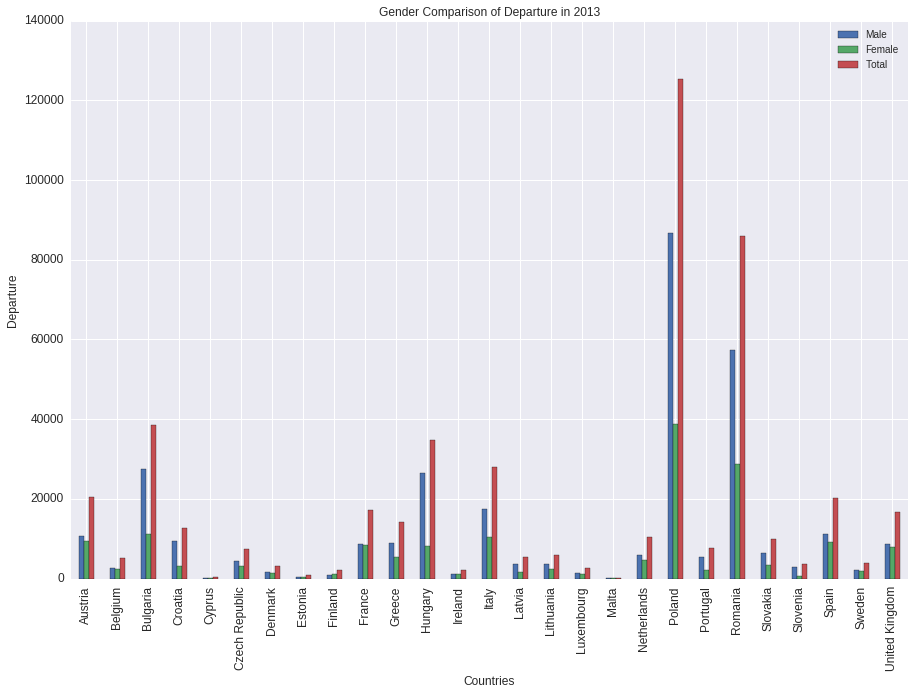

In [53]:
genderplot(Dep13, 2013)

In 2013 Austria, Beligium, Cyprus, Denmark, Estonia, Finland, France, Ireland, Luxembourg, Malta, Netherlands,
Sweden and UK had no significant difference while the remaining countries had.

Better way will be to visualise the proportional values and see the difference is significant or not because
if total figure is small then the difference might be large proportionally.

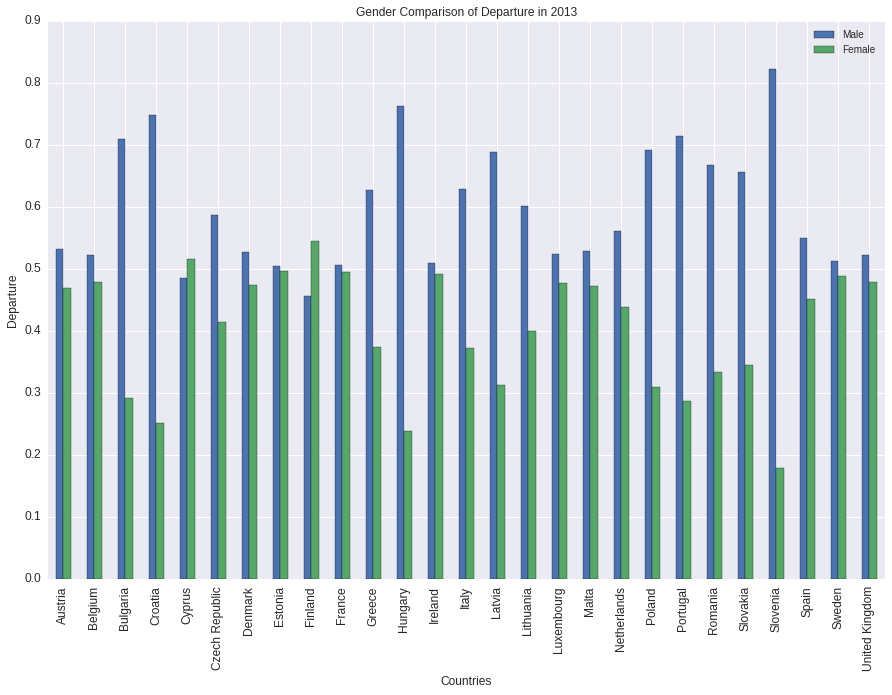

In [71]:
dep_males_13_prop = dep_males_13.div(Dep_df[2013], axis='index')
dep_females_13_prop = dep_females_13.div(Dep_df[2013], axis='index')
dep_females_13_prop
Dep13_prop = pd.concat([dep_males_13_prop, dep_females_13_prop], axis=1, join_axes=[dep_females_13_prop.index])
Dep13_prop.columns = ('Male', 'Female')
Dep13_prop

ax = Dep13_prop[['Male', 'Female']].plot(kind='bar', title ="Gender Comparison of Departure in %s" %2013,figsize=(15,10),legend=True, fontsize=12)
ax.set_xlabel("Countries",fontsize=12)
ax.set_ylabel("Departure",fontsize=12)
plt.show()
#df = df.div(df.QT, axis='index')

If we look at 2013's gender departure comparison plot, it seems that Bulgaria, Croatia, Greece, Hungary,
Lithunia, Latvia, Poland, Romania, Slovenia has significant difference.

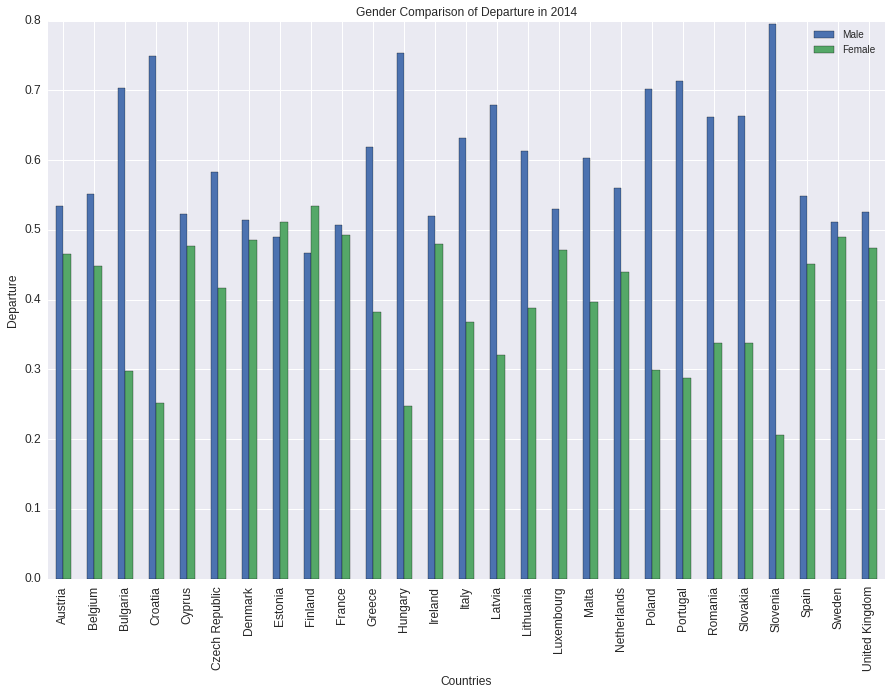

In [72]:
dep_males_14_prop = dep_males_14.div(Dep_df[2014], axis='index')
dep_females_14_prop = dep_females_14.div(Dep_df[2014], axis='index')
dep_females_14_prop
Dep14_prop = pd.concat([dep_males_14_prop, dep_females_14_prop], axis=1, join_axes=[dep_females_14_prop.index])
Dep14_prop.columns = ('Male', 'Female')
Dep14_prop

ax = Dep14_prop[['Male', 'Female']].plot(kind='bar', title ="Gender Comparison of Departure in %s" %2014,figsize=(15,10),legend=True, fontsize=12)
ax.set_xlabel("Countries",fontsize=12)
ax.set_ylabel("Departure",fontsize=12)
plt.show()

In 2014 trend seems to be similar, however male proportion's departure has increased in 2014 if compared by
2013 